# **Descriptive Analytics for Numerical Columns**

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('sales_data_with_discounts.csv')

df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [26]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [27]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


## *1. Identify numerical columns in the dataset.*

In [3]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns)

['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


## *2. Calculate the mean, median, mode, and standard deviation for these columns.*

In [6]:
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
mode_values = df[numerical_columns].mode().iloc[0]
std_dev_values = df[numerical_columns].std()

In [ ]:
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_dev_values
})

print(stats_df)

                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


## *3. Provide a brief interpretation of these statistics.*

Interpretation of Statistics

The statistics provided give us a summary of the numerical columns in the dataset. Here is a brief interpretation of each statistic:

    - The mean (average) values indicate the central tendency of the data. For example, the average volume of sales is approximately 5.07 units, and the average price is around 10,453.43.

    - The median values represent the middle value when the data is sorted in ascending order. This is useful for understanding the central tendency without the influence of outliers. For instance, the median volume of sales is 4 units, and the median price is 1,450.

    - The mode values indicate the most frequently occurring values in the dataset. For example, the most common volume of sales is 3 units, and the most common price is 400.

    - The standard deviation values measure the dispersion or variability in the data. A higher standard deviation indicates more spread out data. For instance, the standard deviation for the average price is quite high at 18,079.90, indicating significant variability in prices.

Overall, these statistics provide a comprehensive overview of the central tendency and variability in the dataset, helping us understand the distribution and spread of the numerical values.

# **Data Visualization**

## *1. Histograms:*

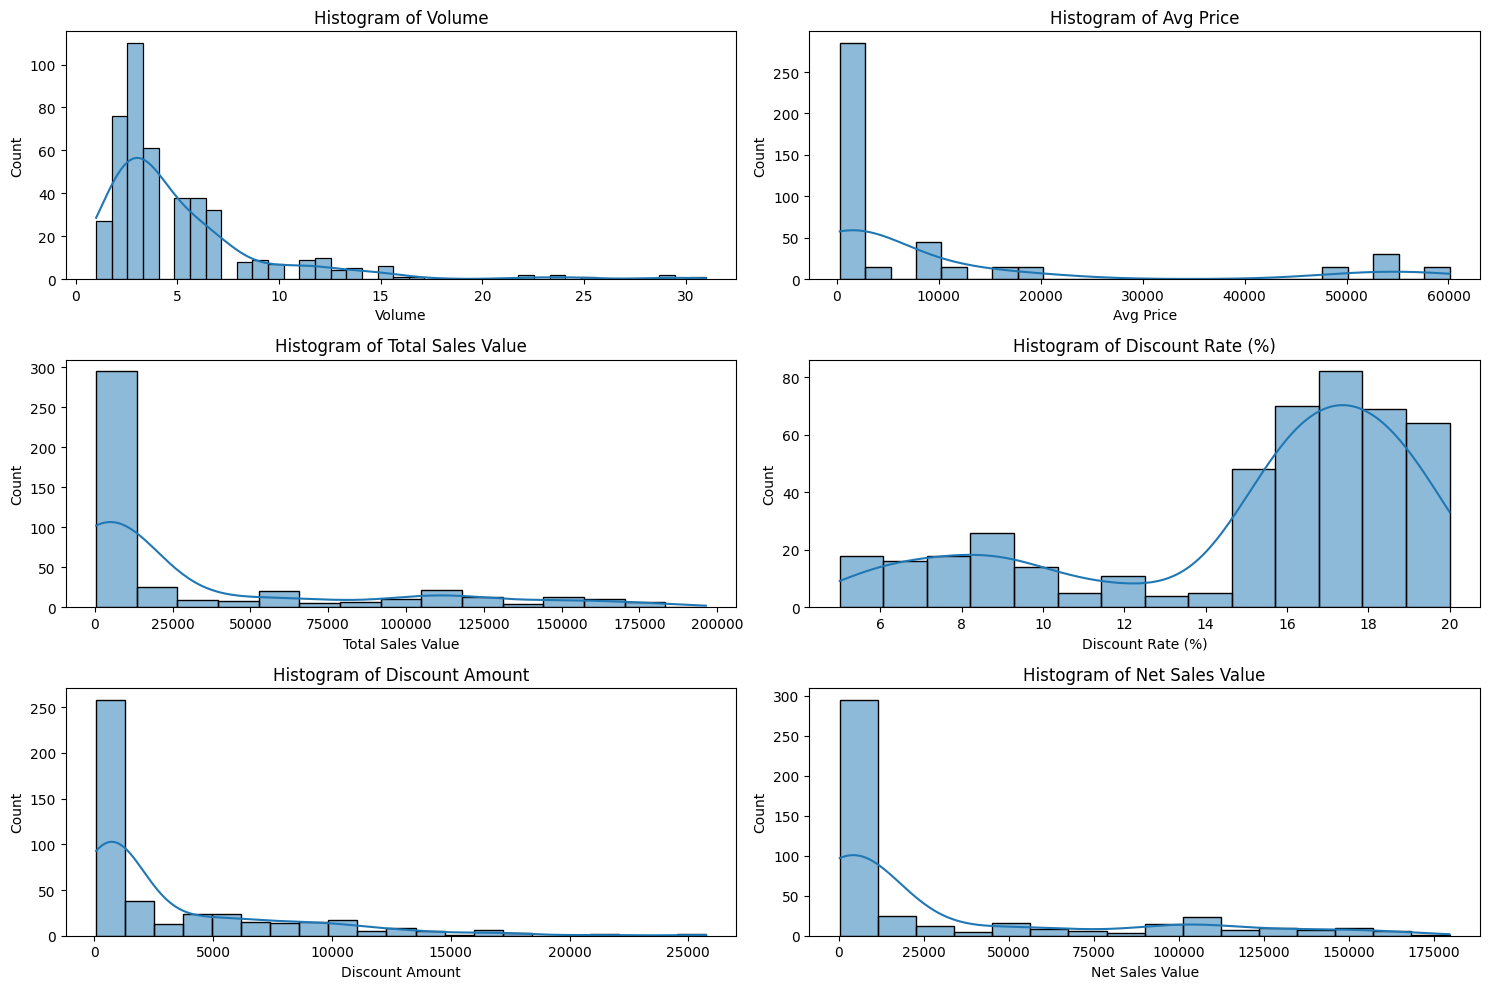

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In [14]:
skewness_values = df[numerical_columns].skew()
print("Skewness of numerical columns:\n", skewness_values)

Skewness of numerical columns:
 Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64


## *2. Boxplots:*

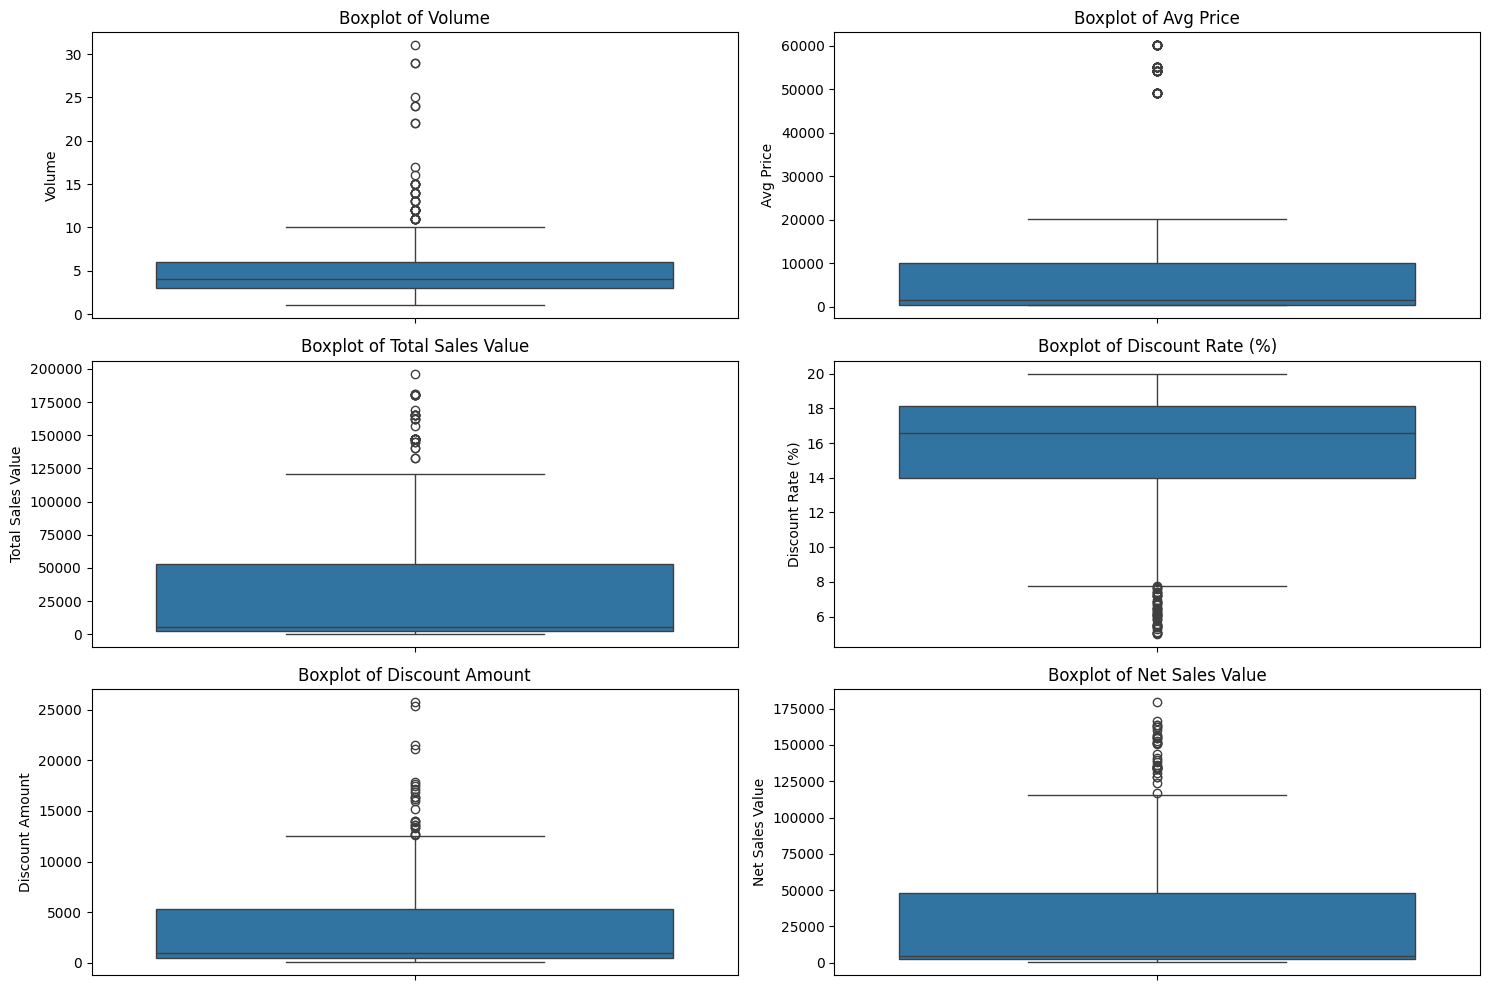

In [12]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Based on the skewness values and boxplots, we can make the following observations:

1. **Volume**: The skewness value of 2.73 indicates a highly right-skewed distribution. The boxplot shows several extreme values (outliers) on the higher end, suggesting that some instances have unusually high volumes.

2. **Average Price**: The skewness value of 1.91 indicates a right-skewed distribution. The boxplot reveals outliers on the higher end, indicating that some products have significantly higher average prices compared to others.

3. **Total Sales Value**: The skewness value of 1.53 indicates a right-skewed distribution. The boxplot shows outliers on the higher end, suggesting that some instances have unusually high total sales values.

4. **Discount Amount**: The skewness value of 1.91 indicates a right-skewed distribution. The boxplot reveals outliers on the higher end, indicating that some transactions have significantly higher discount amounts.

5. **Net Sales Value**: The skewness value of 1.54 indicates a right-skewed distribution. The boxplot shows outliers on the higher end, suggesting that some instances have unusually high net sales values.

6. **Discount Rate (%)**: The skewness value of -1.06 indicates a left-skewed distribution. The boxplot reveals outliers on the lower end, indicating that some transactions have significantly lower discount rates.

Overall, the presence of high skewness and outliers in these columns suggests that the data contains extreme values or unusual distributions. These findings can impact the analysis and should be considered when interpreting the results.

## *3. Bar Chart Analysis for Categorical Column:*

In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)


['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


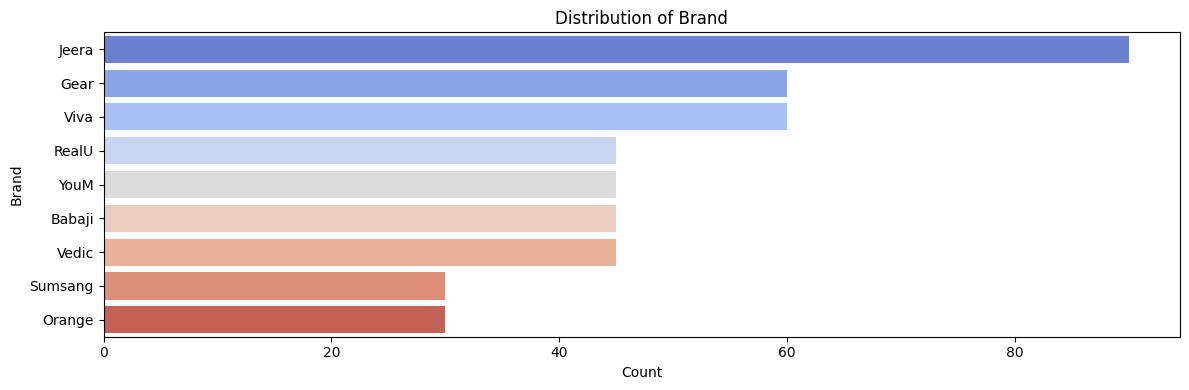

In [47]:
cols=[  'Brand']
plt.figure(figsize=(12, len(cols) * 4))

# Create bar charts for each categorical column
for i, col in enumerate(cols):
    plt.subplot(len(cols), 1, i + 1)
    value_counts = df[col].value_counts()[:10]  # Show top 10 categories for clarity
    sns.barplot(x=value_counts.values, y=value_counts.index, palette="coolwarm",hue=value_counts.index,legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


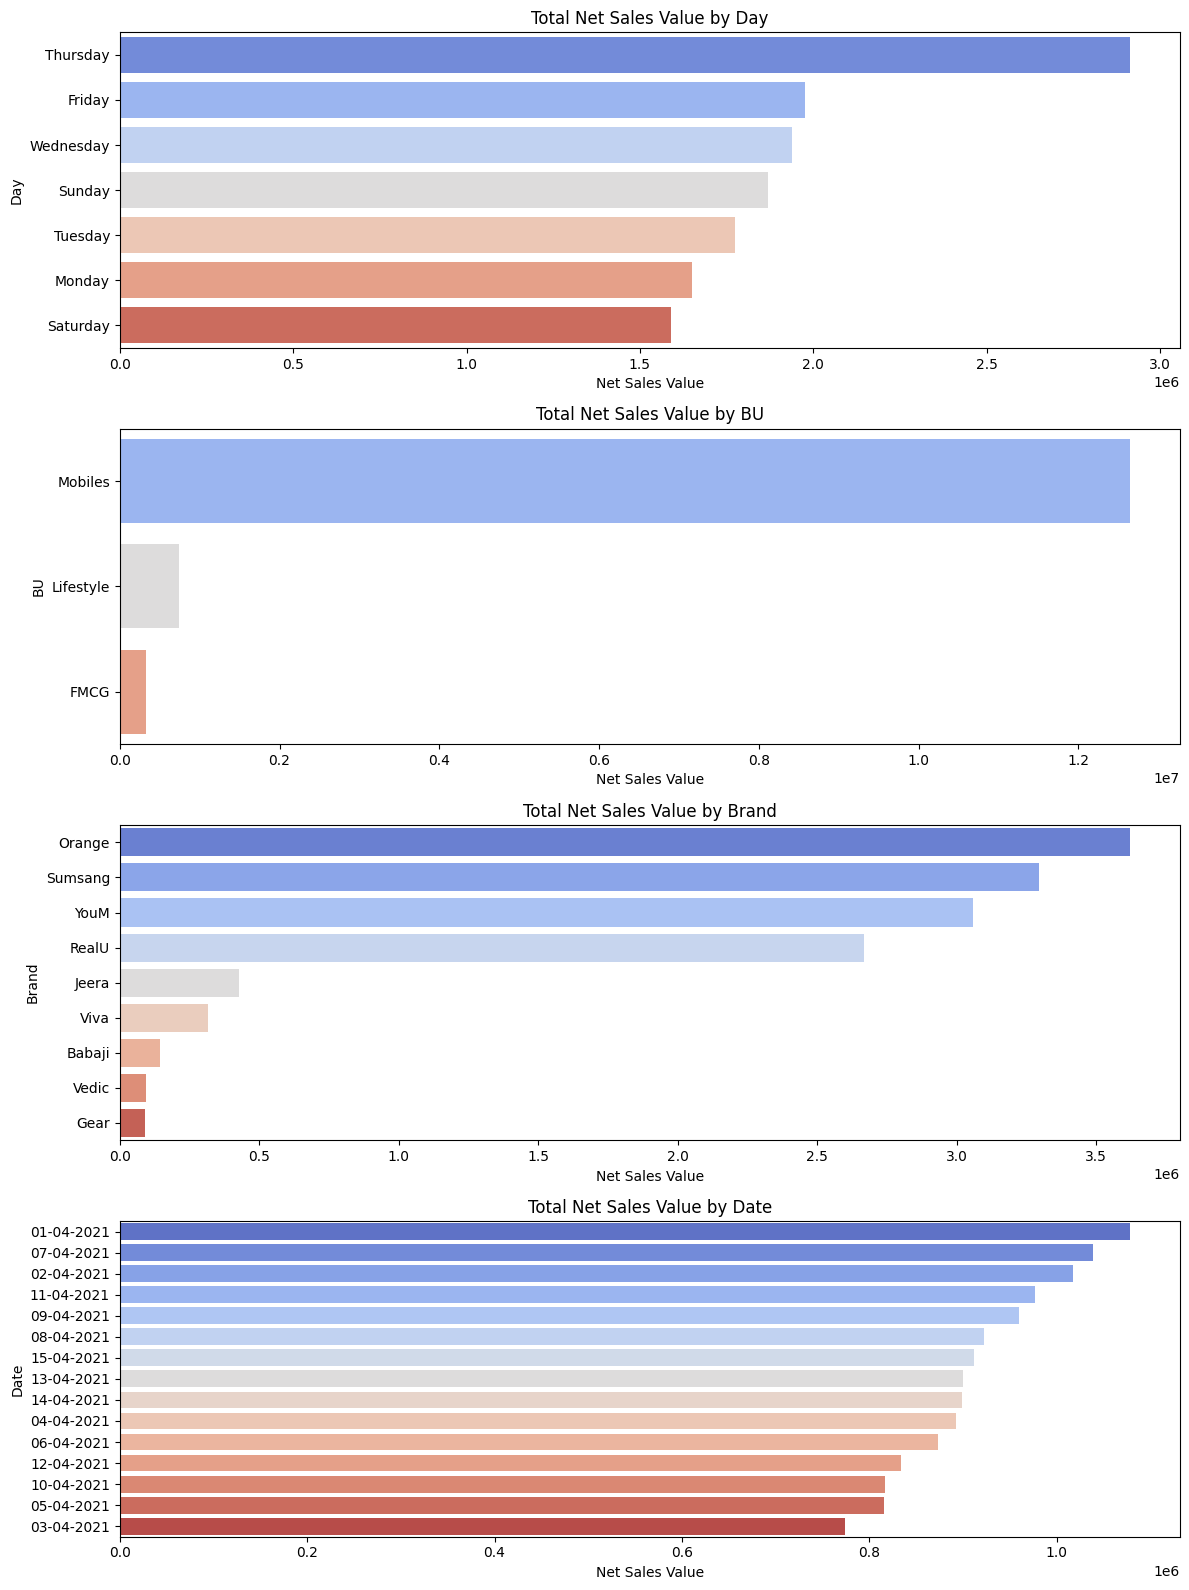

In [46]:
category_metrics = {
    "Day": "Net Sales Value",        # Total sales per day
    "BU": "Net Sales Value",         # Total sales per business unit
    "Brand": "Net Sales Value",      # Total sales per brand
    "Date": "Net Sales Value"      
}

plt.figure(figsize=(12, len(category_metrics) * 4))

# Create bar charts with numerical insights
for i, (category, metric) in enumerate(category_metrics.items()):
    plt.subplot(len(category_metrics), 1, i + 1)
    aggregated_data = df.groupby(category)[metric].sum().sort_values(ascending=False)
    sns.barplot(x=aggregated_data.values, y=aggregated_data.index, palette="coolwarm", hue=aggregated_data.index, dodge=False)
    plt.title(f'Total {metric} by {category}')
    plt.xlabel(metric)
    plt.ylabel(category)

plt.tight_layout()
plt.show()

## *3.Analysis of Category Distribution and Insights*

### 1. Distribution of Categories

The dataset contains several categorical columns, including 'Date', 'Day', 'SKU', 'City', 'BU', 'Brand', and 'Model'. Here, we focus on the distribution of the 'Brand' and 'Model' categories, as well as the total sales value aggregated by 'Date', 'Day', 'BU', and 'Brand'.

#### Brand Distribution
The 'Brand' column contains various brands, and the distribution of these brands can provide insights into the popularity and sales performance of each brand. The top brands by sales volume are:

- Jeera
- Gear
- Viva
- RealU
- YouM
- Babaji
- Vedic
- Sumsang
- Orange

#### Model Distribution
The 'Model' column contains different product models, and analyzing the distribution of these models can help identify the most popular and best-selling models. The top models by sales volume are:

- RU-10
- RU-9 Plus
- M-Formals
- W-Lounge
- W-Western
- M-Casuals
- M-Jeans
- W-Inners
- W-Casuals
- M- Inners

### 2. Aggregated Sales Insights

#### Total Sales by Date
The total sales value aggregated by 'Date' shows the daily sales performance. The top dates by total sales value are:

- 01-04-2021: 1,077,838
- 07-04-2021: 1,039,150
- 02-04-2021: 1,017,006

These dates indicate peak sales periods, which could be due to promotions, holidays, or other factors.

#### Total Sales by Day
The total sales value aggregated by 'Day' provides insights into the weekly sales performance. Analyzing sales by day can help identify trends and patterns, such as higher sales on weekends or specific weekdays.

#### Total Sales by Business Unit (BU)
The total sales value aggregated by 'BU' shows the performance of different business units. This analysis can help identify the most profitable business units and areas for improvement.

#### Total Sales by Brand
The total sales value aggregated by 'Brand' provides insights into the performance of different brands. The top brands by total sales value are:

- Jeera
- Gear
- Viva
- RealU
- YouM

### Insights

1. **Brand Popularity**: The analysis shows that certain brands, such as Jeera, Gear, and Viva, have higher sales volumes and total sales values. These brands are likely more popular among customers and contribute significantly to the overall sales.

2. **Model Performance**: Specific models, such as RU-10 and RU-9 Plus, have higher sales volumes, indicating their popularity and demand in the market.

3. **Sales Trends**: The aggregated sales by date reveal peak sales periods, which could be leveraged for future marketing and promotional activities.

4. **Business Unit Performance**: Analyzing sales by business unit helps identify the most profitable units and areas that may need attention or improvement.

5. **Day-wise Sales Patterns**: Understanding sales patterns by day can help optimize inventory management, staffing, and marketing strategies to maximize sales on high-performing days.

Overall, the distribution analysis of categories provides valuable insights into the sales performance, customer preferences, and potential areas for growth and improvement.


# **Standardization of Numerical Variables**

## *1. Explain the concept of standardization (z-score normalization).*

### **Standardization (Z-Score Normalization)**
**Standardization**, also known as **Z-score normalization**, is a technique used to scale numerical data so that it has a **mean of 0** and a **standard deviation of 1**. This helps in making different features **comparable**, especially when they have different units or ranges.

Formula for Z-score Normalization:  
𝑍 = (𝑋 − 𝜇) /  𝜎
 
Where:

X = Original value  
μ = Mean of the feature     
σ = Standard deviation of the feature   
Z = Standardized value

### **Why is Standardization Needed?**
- **Handles different scales**: Some features may have large values (e.g., annual income in dollars) while others have small values (e.g., age). Standardization brings them to the same scale.
- **Improves machine learning models**: Algorithms like **KNN, Logistic Regression, and SVM** perform better with standardized data.
- **Faster convergence**: Gradient-based algorithms (e.g., Neural Networks) train faster when data is standardized.

### **Example in Python:**
```python
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample dataset
data = {'Sales': [1000, 5000, 12000, 3000, 8000], 'Discount': [5, 10, 15, 5, 20]}
df = pd.DataFrame(data)

# Standardization
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_standardized)
```

### **Interpretation:**
- After standardization, the transformed values have a **mean of 0** and a **standard deviation of 1**.
- A positive Z-score means the value is **above average**, while a negative Z-score means it is **below average**.

## *2.Standardize the numerical columns using the formula: z=x-mu/sigma*

In [ ]:

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

mean_values = df[numerical_cols].mean()
std_values = df[numerical_cols].std()

df_standardized = df.copy()
df_standardized[numerical_cols] = (df[numerical_cols] - mean_values) / std_values

## *3. ​Show before and after comparisons of the data distributions.*

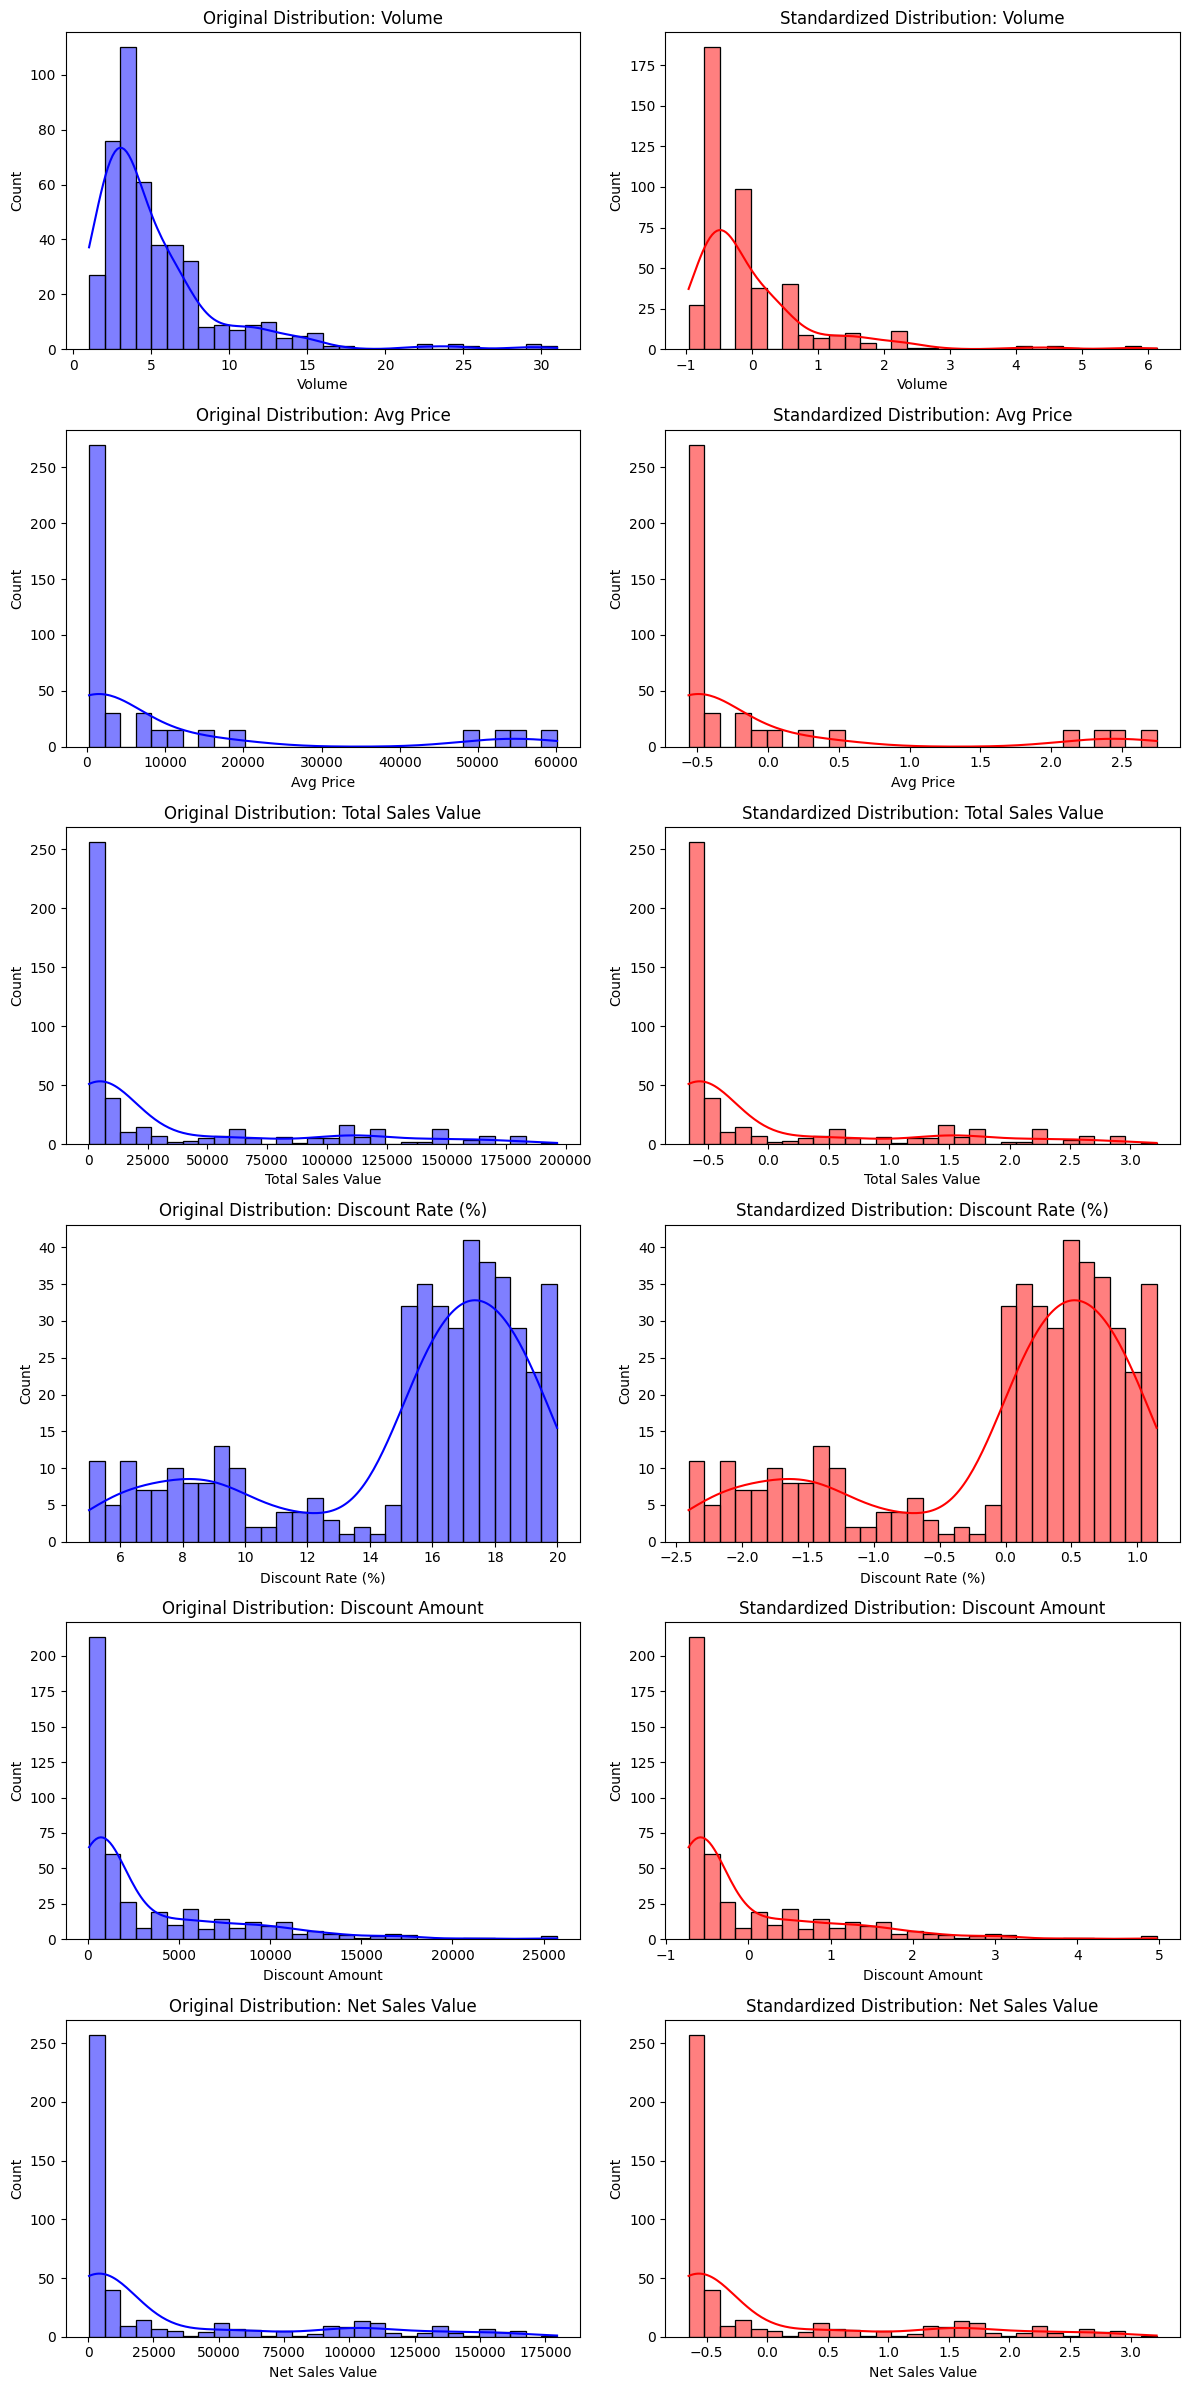

In [59]:


plt.figure(figsize=(12, len(numerical_cols) * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, 2*i + 1)
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f"Original Distribution: {col}")

    plt.subplot(len(numerical_cols), 2, 2*i + 2)
    sns.histplot(df_standardized[col], kde=True, bins=30, color="red")
    plt.title(f"Standardized Distribution: {col}")

plt.tight_layout()
plt.show()


# **Conversion of Categorical Data into Dummy Variables**

## *1. Discuss the need for converting categorical data into dummy variables (one-hot encoding).*

# **Why Convert Categorical Data into Dummy Variables (One-Hot Encoding)?**

### 🔹 The Need for One-Hot Encoding:
- Many machine learning algorithms **cannot work directly** with categorical data (e.g., "Product Type" = 'A', 'B', 'C').
- Models require **numerical inputs**, so we must convert text categories into numbers.
- One-hot encoding **creates separate binary columns (0 or 1) for each category**, preserving meaningful information.

### 🔹 Example:
#### Original Data:
| ID  | Color  |
|---- |------ |
| 1   | Red   |
| 2   | Blue  |
| 3   | Red   |
| 4   | Green |

#### After One-Hot Encoding:
| ID  | Color_Red | Color_Blue | Color_Green |
|---- |--------- |---------- |----------- |
| 1   | 1        | 0         | 0          |
| 2   | 0        | 1         | 0          |
| 3   | 1        | 0         | 0          |
| 4   | 0        | 0         | 1          |

- Now, each category is represented as a **separate binary column**.
- This avoids issues like **assigning arbitrary numerical values (e.g., Red = 1, Blue = 2, Green = 3), which could mislead models**.

---


## *2. Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.*

In [68]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)  # drop_first=True avoids multicollinearity
df_encoded = df_encoded.astype(int)

## *3. Display a portion of the transformed dataset.*

In [69]:
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11,21153,160346,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11,11676,89323,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9,10657,102042,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6,8364,112235,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17,4372,19927,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# **Conclusion**

## Summary of Key Findings from Descriptive Analytics and Data Visualizations

### Descriptive Analytics:
1. **Central Tendency**:
    - The mean values provide an average measure of the numerical columns, indicating the central tendency of the data.
    - The median values offer a middle value, which is less affected by outliers compared to the mean.
    - The mode values show the most frequently occurring values in the dataset.

2. **Variability**:
    - The standard deviation values indicate the spread or dispersion of the data. Higher standard deviation values suggest more variability in the data.

3. **Skewness**:
    - The skewness values reveal the asymmetry in the distribution of numerical columns. Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.

### Data Visualizations:
1. **Histograms**:
    - Histograms provide a visual representation of the distribution of numerical columns. The presence of skewness and outliers can be easily identified.

2. **Boxplots**:
    - Boxplots highlight the spread and central tendency of the data, as well as the presence of outliers. They are useful for comparing distributions across different categories.

3. **Bar Charts**:
    - Bar charts for categorical columns show the distribution and frequency of different categories. They help identify the most common and least common categories.

4. **Aggregated Sales Insights**:
    - Aggregated bar charts for sales metrics by different categories (e.g., Date, Day, BU, Brand) provide insights into sales performance and trends.

## Importance of Data Preprocessing Steps

### Standardization:
- **Handles Different Scales**: Standardization scales numerical data to have a mean of 0 and a standard deviation of 1, making features comparable.
- **Improves Model Performance**: Algorithms like KNN, Logistic Regression, and SVM perform better with standardized data.
- **Faster Convergence**: Gradient-based algorithms (e.g., Neural Networks) train faster when data is standardized.

### One-Hot Encoding:
- **Converts Categorical Data**: Many machine learning algorithms require numerical inputs. One-hot encoding converts categorical data into binary columns, preserving meaningful information.
- **Avoids Misleading Models**: Assigning arbitrary numerical values to categories can mislead models. One-hot encoding avoids this issue by creating separate binary columns for each category.
- **Preserves Information**: One-hot encoding ensures that no information is lost during the conversion of categorical data to numerical format.

Overall, data preprocessing steps like standardization and one-hot encoding are crucial for ensuring that the data is in a suitable format for analysis and machine learning, leading to more accurate and reliable results.